In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/HP/Downloads/hrdata.csv')
df

,emp_no,gender,marital_status,age_band,age,department,education,education_field,job_role,business_travel,employee_count,attrition,attrition_label,job_satisfaction,active_employee
0,10001,Female,Single,35 - 44,41,Sales,Associates Degree,Life Sciences,Sales Executive,Travel_Rarely,1,Yes,Ex-Employees,4,0
1,10002,Male,Married,45 - 54,49,R&D,High School,Life Sciences,Research Scientist,Travel_Frequently,1,No,Current Employees,2,1
2,10003,Male,Single,35 - 44,37,R&D,Associates Degree,Other,Laboratory Technician,Travel_Rarely,1,Yes,Ex-Employees,3,0
3,10004,Female,Married,25 - 34,33,R&D,Master's Degree,Life Sciences,Research Scientist,Travel_Frequently,1,No,Current Employees,3,1
4,10005,Male,Married,25 - 34,27,R&D,High School,Medical,Laboratory Technician,Travel_Rarely,1,No,Current Employees,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,11466,Male,Married,25 - 34,34,R&D,Master's Degree,Technical Degree,Research Scientist,Non-Travel,1,Yes,Ex-Employees,1,0
1466,11467,Male,Single,25 - 34,29,R&D,Associates Degree,Life Sciences,Research Scientist,Travel_Frequently,1,Yes,Ex-Employees,4,0
1467,11468,Male,Single,35 - 44,35,Sales,Master's Degree,Other,Sales Executive,Travel_Frequently,1,Yes,Ex-Employees,4,0
1468,11469,Male,Single,Under 25,22,R&D,High School,Life Sciences,Research Scientist,Travel_Rarely,1,Yes,Ex-Employees,2,0


In [3]:
df.shape

(1470, 15)

In [4]:
df.dtypes

emp_no               int64
gender              object
marital_status      object
age_band            object
age                  int64
department          object
education           object
education_field     object
job_role            object
business_travel     object
employee_count       int64
attrition           object
attrition_label     object
job_satisfaction     int64
active_employee      int64
dtype: object

In [5]:
df.head()

,emp_no,gender,marital_status,age_band,age,department,education,education_field,job_role,business_travel,employee_count,attrition,attrition_label,job_satisfaction,active_employee
0,10001,Female,Single,35 - 44,41,Sales,Associates Degree,Life Sciences,Sales Executive,Travel_Rarely,1,Yes,Ex-Employees,4,0
1,10002,Male,Married,45 - 54,49,R&D,High School,Life Sciences,Research Scientist,Travel_Frequently,1,No,Current Employees,2,1
2,10003,Male,Single,35 - 44,37,R&D,Associates Degree,Other,Laboratory Technician,Travel_Rarely,1,Yes,Ex-Employees,3,0
3,10004,Female,Married,25 - 34,33,R&D,Master's Degree,Life Sciences,Research Scientist,Travel_Frequently,1,No,Current Employees,3,1
4,10005,Male,Married,25 - 34,27,R&D,High School,Medical,Laboratory Technician,Travel_Rarely,1,No,Current Employees,2,1


In [6]:
# Total Employee

df['employee_count'].sum()

1470

In [7]:
# Attrition Count

len(df[df['attrition']=='Yes'])

# or

df[df['attrition']=='Yes']['attrition'].value_counts()

Yes    237
Name: attrition, dtype: int64

In [8]:
# Attrition Rate

round(len(df[df['attrition']=='Yes'])*100/df['employee_count'].sum(),2)

16.12

In [9]:
# Active Employees

len(df[df['attrition']=='No'])

1233

In [10]:
# Average Age

df['age'].mean().round(0)

37.0

**Attrition by Gender**

In [11]:
df_a=df[df['attrition']=='Yes']
df_a.head()

,emp_no,gender,marital_status,age_band,age,department,education,education_field,job_role,business_travel,employee_count,attrition,attrition_label,job_satisfaction,active_employee
0,10001,Female,Single,35 - 44,41,Sales,Associates Degree,Life Sciences,Sales Executive,Travel_Rarely,1,Yes,Ex-Employees,4,0
2,10003,Male,Single,35 - 44,37,R&D,Associates Degree,Other,Laboratory Technician,Travel_Rarely,1,Yes,Ex-Employees,3,0
14,10015,Male,Single,25 - 34,28,R&D,Bachelor's Degree,Life Sciences,Laboratory Technician,Travel_Rarely,1,Yes,Ex-Employees,3,0
21,10022,Male,Single,35 - 44,36,Sales,Master's Degree,Life Sciences,Sales Representative,Travel_Rarely,1,Yes,Ex-Employees,1,0
24,10025,Male,Single,25 - 34,34,R&D,High School,Medical,Research Scientist,Travel_Rarely,1,Yes,Ex-Employees,1,0


In [12]:
df1=df.groupby(['gender'],as_index=False)['employee_count'].sum()
df2=df_a.groupby(['gender'],as_index=False)['employee_count'].sum()

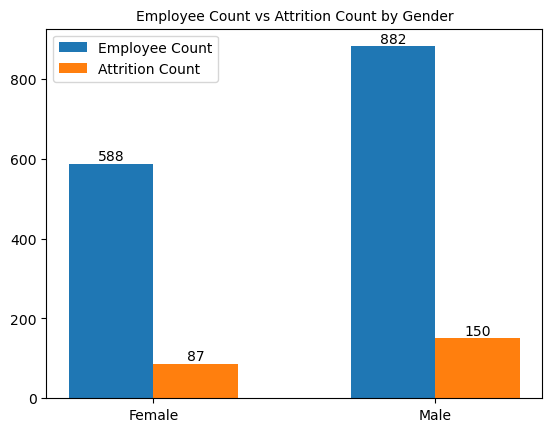

In [13]:
gender=df1['gender'].tolist()

arange=np.arange(0,len(df1))
width=0.3
arange2=arange+width

plt.bar(arange,df1['employee_count'],width,label='Employee Count')
plt.bar(arange2,df2['employee_count'],width,label='Attrition Count')

for i, v in enumerate(df1['employee_count']):
    plt.annotate(str(v),xy=(i,v), ha='center', va='bottom')
    
for i, v in enumerate(df2['employee_count']):
    plt.annotate(str(v), xy=(i+width, v), ha='center', va='bottom')   

plt.xticks((arange+arange2)/2,gender)

plt.legend()
plt.title('Employee Count vs Attrition Count by Gender',size=10)
plt.show()

**Attrition by Department**

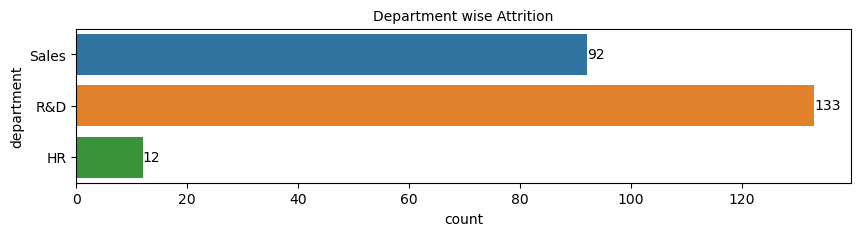

In [14]:
plt.figure(figsize=(10,2))
ax=sns.countplot(data=df_a,y=df_a['department'])
for i in ax.containers:
    ax.bar_label(i)

plt.title('Department wise Attrition',size=10)    
plt.show()

**Employees by Age Group**

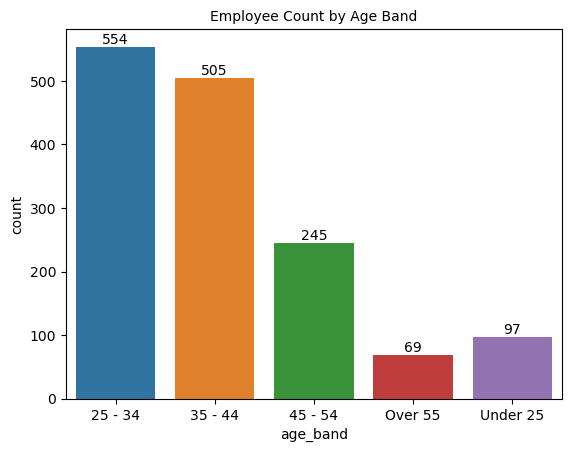

In [15]:
ax1=sns.countplot(data=df,x=df['age_band'].sort_values(ascending=True))

for i in ax1.containers:
    ax1.bar_label(i)

plt.title('Employee Count by Age Band',size=10)    
plt.show()

**Attrition by Education Field**

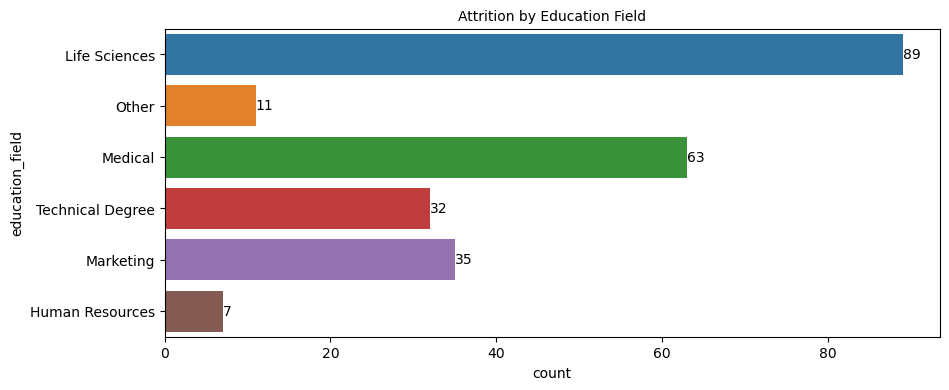

In [16]:
plt.figure(figsize=(10,4))
ax2=sns.countplot(data=df_a,y=df_a['education_field'])
for i in ax2.containers:
    ax2.bar_label(i)

plt.title('Attrition by Education Field',size=10)    
plt.show()

**Attrition by Age Band and Gender**

In [49]:
data1=df_a.groupby(by=['age_band','gender'],as_index=False)['employee_count'].sum()
data1['attrition_rate']=round(data1['employee_count']*100/len(df_a),2)
data1

,age_band,gender,employee_count,attrition_rate
0,25 - 34,Female,43,18.14
1,25 - 34,Male,69,29.11
2,35 - 44,Female,14,5.91
3,35 - 44,Male,37,15.61
4,45 - 54,Female,9,3.80
5,45 - 54,Male,16,6.75
6,Over 55,Female,3,1.27
7,Over 55,Male,8,3.38
8,Under 25,Female,18,7.59
9,Under 25,Male,20,8.44


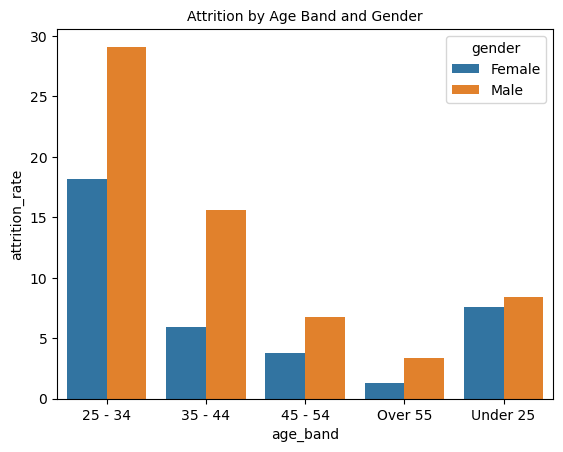

In [56]:
sns.barplot(data=data1,x=data1['age_band'],y=data1['attrition_rate'],hue=data1['gender']) 

plt.title('Attrition by Age Band and Gender',size=10)

plt.show()

**Job Satisfaction Rating**

In [61]:
table1=pd.pivot_table(data=df,values='employee_count',index='job_role',columns='job_satisfaction',aggfunc=np.sum)
table1['Total']=table1[1]+table1[2]+table1[3]+table1[4]

In [62]:
table1

job_satisfaction,1,2,3,4,Total
job_role,,,,,
Healthcare Representative,26,19,43,43,131
Human Resources,10,16,13,13,52
Laboratory Technician,56,48,75,80,259
Manager,21,21,27,33,102
Manufacturing Director,26,32,49,38,145
Research Director,15,16,27,22,80
Research Scientist,54,53,90,95,292
Sales Executive,69,54,91,112,326
Sales Representative,12,21,27,23,83
